# ORDER BY

**ORDER BY** is usually the last clause in your query, and it sorts the results returned by the rest of your query.

Notice that the rows are not ordered by the ID column. We can quickly remedy this with the query below.
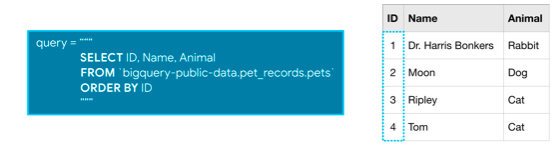

The **ORDER BY** clause also works for columns containing text, where the results show up in alphabetical order.
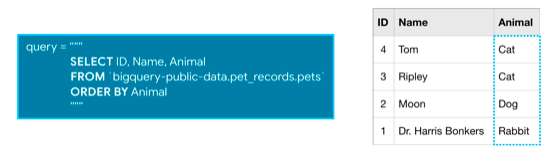

You can reverse the order using the **DESC** argument (short for 'descending'). The next query sorts the table by the `Animal` column, where the values that are last in alphabetic order are returned first.
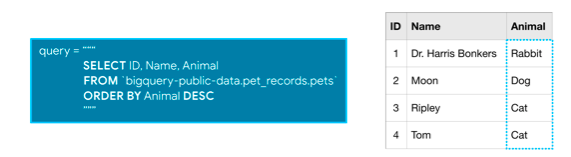

# Dates

Next, we'll talk about dates, because they come up very frequently in real-world databases. There are two ways that dates can be stored in BigQuery: as a **DATE** or as a **DATETIME**.

The DATE format has the year first, then the month, and then the day. It looks like this:

`YYYY-[M]M-[D]D`

The **DATETIME** format is like the date format ... but with time added at the end.

# EXTRACT

Often you'll want to look at part of a date, like the year or the day. You can do this with **EXTRACT**. We'll illustrate this with a slightly different table, called `pets_with_date`.

The query below returns two columns, where column Day contains the day corresponding to each entry the `Date` column from the `pets_with_date table`:
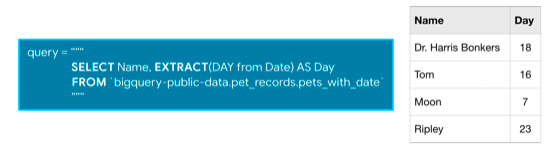

# Example: Which day of the week has the most fatal motor accidents?

Let's use the US Traffic Fatality Records database, which contains information on traffic accidents in the US where at least one person died.

We'll investigate the accident_2015 table. Here is a view of the first few rows. (We have hidden the corresponding code. To take a peek, click on the "Code" button below.)

In [3]:
from google.cloud import bigquery

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/macbookpro/Documents/5. Kaggle/3. SQL/orbital-caldron-272723-ed30f065fd90.json"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,...,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,...,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,...,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-10-31 04:49:00+00:00


Let's use the table to determine how the number of accidents varies with the day of the week. Since:

- the `consecutive_number` column contains a unique ID for each accident, and
- the `timestamp_of_crash` column contains the date of the accident in DATETIME format,
we can:

**EXTRACT** the day of the week (as day_of_week in the query below) from the `timestamp_of_crash` column, and
**GROUP BY** the day of the week, before we **COUNT** the `consecutive_number` column to determine the number of accidents for each day of the week.
Then we sort the table with an **ORDER BY** clause, so the days with the most accidents are returned first.

In [8]:
query = """
        SELECT COUNT(consecutive_number) AS num_accidents,
            EXTRACT (DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


# Exercise

The World Bank has made tons of interesting education data available through BigQuery. Run the following cell to see the first few rows of the `international_educatio` table from the `world_bank_intl_education` datase.

In [10]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "world_bank_intl_education" dataset
dataset_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "international_education" table
table_ref = dataset_ref.table("international_education")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "international_education" table
client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Liberia,LBR,Population of the official age for pre-primary...,SP.PRE.TOTL.FE.IN,198386.0,2016
1,Liberia,LBR,Population of the official age for primary edu...,SP.PRM.TOTL.MA.IN,378135.0,2016
2,Liberia,LBR,"Population, ages 0-14, total",SP.POP.0014.TO,1942948.0,2016
3,Liechtenstein,LIE,Official entrance age to upper secondary educa...,UIS.THAGE.3.A.GPV,16.0,2016
4,Mauritania,MRT,Population of the official entrance age to pri...,UIS.SAP.1.G1.F,54568.0,2016


### 1) Government expenditure on education

The value in the `indicator_code` column describes what type of data is shown in a given row.  

One interesting indicator code is `SE.XPD.TOTL.GD.ZS`, which corresponds to "Government expenditure on education as % of GDP (%)".

Which countries spend the largest fraction of GDP on education?  

To answer this question, consider only the rows in the dataset corresponding to indicator code `SE.XPD.TOTL.GD.ZS`, and write a query that returns the average value in the `value` column for each country in the dataset between the years 2010-2017 (including 2010 and 2017 in the average). 

Requirements:
- Your results should have the country name rather than the country code. You will have one row for each country.
- The aggregate function for average is **AVG()**.  Use the name `avg_ed_spending_pct` for the column created by this aggregation.
- Order the results so the countries that spend the largest fraction of GDP on education show up first.



In [15]:
country_spend_pct_query = """
                          SELECT country_name, AVG(value) AS avg_ed_spending_pct
                          FROM `bigquery-public-data.world_bank_intl_education.international_education`
                          WHERE (indicator_code = 'SE.XPD.TOTL.GD.ZS' AND year>=2010 AND year<=2017)
                          GROUP BY country_name
                          ORDER BY avg_ed_spending_pct DESC
                          """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
country_spending_results = country_spend_pct_query_job.to_dataframe()

# View top few rows of results
print(country_spending_results.head())

            country_name  avg_ed_spending_pct
0                   Cuba            12.837270
1  Micronesia, Fed. Sts.            12.467750
2        Solomon Islands            10.001080
3                Moldova             8.372153
4                Namibia             8.349610


### 2) Identify interesting codes to explore

The last question started by telling you to focus on rows with the code `SE.XPD.TOTL.GD.ZS`. But how would you find more interesting indicator codes to explore?

There are 1000s of codes in the dataset, so it would be time consuming to review them all. But many codes are available for only a few countries. When browsing the options for different codes, you might restrict yourself to codes that are reported by many countries.

Write a query below that selects the indicator code and indicator name for all codes with at least 175 rows in the year 2016.

Requirements:
- You should have one row for each indicator code.
- The columns in your results should be called `indicator_code`, `indicator_name`, and `num_rows`.
- Only select codes with 175 or more rows in the raw database (exactly 175 rows would be included).
- To get both the `indicator_code` and `indicator_name` in your resulting DataFrame, you need to include both in your **SELECT** statement (in addition to a **COUNT()** aggregation). This requires you to include both in your **GROUP BY** clause.
- Order from results most frequent to least frequent.


In [24]:
code_count_query = """
                   SELECT indicator_code, indicator_name, COUNT(1) AS num_rows
                   FROM `bigquery-public-data.world_bank_intl_education.international_education`
                   WHERE year = 2016
                   GROUP BY indicator_code, indicator_name
                   HAVING num_rows >= 175
                   ORDER BY num_rows DESC
                   """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
code_count_query_job = client.query(code_count_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
code_count_results = code_count_query_job.to_dataframe()

# View top few rows of results
print(code_count_results.head())

      indicator_code                      indicator_name  num_rows
0        SP.POP.GROW        Population growth (annual %)       232
1        SP.POP.TOTL                   Population, total       232
2     IT.NET.USER.P2     Internet users (per 100 people)       223
3     SP.POP.0014.TO        Population, ages 0-14, total       213
4  SP.POP.0014.TO.ZS  Population, ages 0-14 (% of total)       213
